In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("C:\\Users\\bidve\\OneDrive\\Desktop\\DS\\CSV files\\Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df.drop(['area_type','society','balcony', 'availability'], axis = 1, inplace = True)
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [6]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [7]:
df['bath'].fillna(int(df['bath'].mean()), inplace = True)

In [8]:
df.isna().sum()

location       1
size          16
total_sqft     0
bath           0
price          0
dtype: int64

In [9]:
df.dropna(inplace = True)
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df.shape

(13303, 5)

In [11]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df['BHK'] = df['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13303, dtype: object

In [15]:
df.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df[~df['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
56,Devanahalli,4 Bedroom,3010 - 3410,2.0,192.000,4
81,Hennur Road,4 Bedroom,2957 - 3450,2.0,224.500,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
224,Devanahalli,3 BHK,1520 - 1740,2.0,74.820,3
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2


In [18]:
def convert_sqft(x):
    token = x.split('-')
    if len(token) == 2:
        return (float(token[0]) + float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
convert_sqft('2166')

2166.0

In [20]:
convert_sqft('2166 - 2168')

2167.0

In [21]:
convert_sqft('34.46Sq. Meter')

In [22]:
df1 = df.copy()
df1['total_sqft'] = df1['total_sqft'].apply(convert_sqft)

In [23]:
df = df1.dropna()

In [24]:
df.shape

(13257, 6)

In [25]:
df.head(31)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [26]:
df.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

In [27]:
df.head(500)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
496,Yelahanka,2 BHK,1035.0,2.0,45.00,2
497,Kereguddadahalli,2 BHK,950.0,2.0,32.00,2
498,Bisuvanahalli,3 BHK,1075.0,2.0,36.00,3
499,Whitefield,2 BHK,1040.0,2.0,48.50,2


In [28]:
df_copy = df.copy()
df_copy.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [29]:
len(df.location.unique())

1298

In [30]:
df.location = df.location.apply(lambda x: x.strip())

location_stats = df.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

C:\Users\bidve\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


location
Whitefield               538
Sarjapur  Road           397
Electronic City          304
Kanakpura Road           271
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [31]:
len(location_stats[location_stats<=10])

1047

In [32]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [33]:
df.location = df.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x )
df.head(10)

C:\Users\bidve\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,other,6 Bedroom,1020.0,6.0,370.00,6


In [34]:
df.shape

(13257, 6)

In [35]:
df_new = df[~(df.total_sqft/df.BHK<100)]



In [36]:
df_new.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [37]:
df_new['price_per_sqft'] = (df_new.price)*100000/df_new.total_sqft

df_new

<ipython-input-37-576aae461132>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['price_per_sqft'] = (df_new.price)*100000/df_new.total_sqft


,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [38]:
df_new.describe()



,total_sqft,bath,price,BHK,price_per_sqft
count,13217.000000,13217.000000,13217.000000,13217.000000,13217.000000
mean,1561.782495,2.674888,112.437320,2.787017,6664.280660
std,1238.962976,1.272259,149.216063,1.213120,4500.658491
min,250.000000,1.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,50.000000,2.000000,4266.666667
50%,1277.000000,2.000000,71.810000,3.000000,5425.709516
75%,1680.000000,3.000000,120.000000,3.000000,7281.553398
max,52272.000000,27.000000,3600.000000,27.000000,176470.588235


In [39]:
Q1 = df_new.price_per_sqft.quantile(0.25)
Q3 = df_new.price_per_sqft.quantile(0.75)

Min = df_new.price_per_sqft.min()

Max = df_new.price_per_sqft.max()

IQR = Q3 - Q1
IQR



3014.8867313915853

In [40]:

Max+IQR*1.5

180992.9183323815

In [41]:
df_new['price_per_sqft_minmax'] = df_new.price_per_sqft.apply(lambda x: round(((x-Min)*(100-0))/(Max - Min)))



<ipython-input-41-f285c622e371>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['price_per_sqft_minmax'] = df_new.price_per_sqft.apply(lambda x: round(((x-Min)*(100-0))/(Max - Min)))


<AxesSubplot:ylabel='price_per_sqft_minmax'>

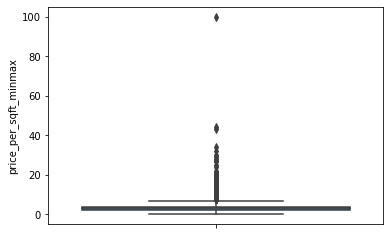

In [42]:
sns.boxplot(data=df_new, y = "price_per_sqft_minmax")

In [43]:
df_new.shape

(13217, 8)

In [44]:
def removeOutliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out    
        

In [45]:
df_removedOutliers = removeOutliers(df_new)
df_removedOutliers.shape

(10977, 8)

In [46]:
df_removedOutliers

,location,size,total_sqft,bath,price,BHK,price_per_sqft,price_per_sqft_minmax
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.00,4,15017.543860,8
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.00,3,11901.840491,7
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.00,6,10416.666667,6
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.00,3,12533.333333,7
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.00,7,9139.784946,5
...,...,...,...,...,...,...,...,...
10972,other,2 BHK,1353.0,2.0,110.00,2,8130.081301,4
10973,other,1 Bedroom,812.0,1.0,26.00,1,3201.970443,2
10974,other,3 BHK,1440.0,2.0,63.93,3,4439.583333,2
10975,other,2 BHK,1075.0,2.0,48.00,2,4465.116279,2


<AxesSubplot:ylabel='price_per_sqft_minmax'>

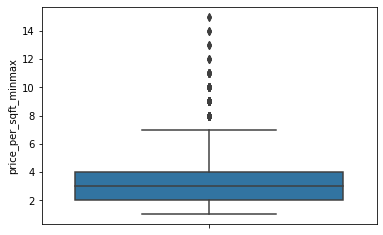

In [47]:
sns.boxplot(data=df_removedOutliers, y = "price_per_sqft_minmax" )

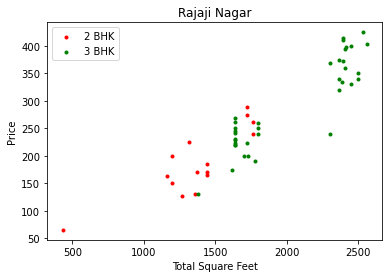

In [48]:
def plot_scatter(df, location):
    bhk2 = df[(df.location == location) & (df.BHK==2)]
    bhk3 = df[(df.location == location) & (df.BHK==3)]
    plt.scatter(bhk2.total_sqft, bhk2.price, marker=".", color="red", label = "2 BHK" )
    plt.scatter(bhk3.total_sqft, bhk3.price, marker=".", color="green", label = "3 BHK" ) 
    plt.title(location)
    plt.xlabel("Total Square Feet")
    plt.ylabel("Price")
    plt.legend()

plot_scatter(df_removedOutliers, 'Rajaji Nagar')

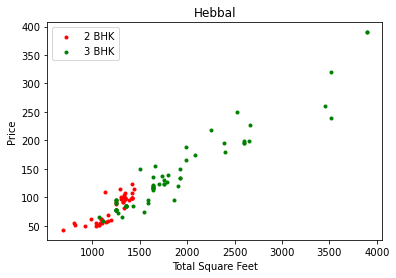

In [49]:
plot_scatter(df_removedOutliers, 'Hebbal')

In [50]:
df_removedOutliers.shape

(10977, 8)

In [51]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean' : np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')

final_removed_Outlier_df = remove_bhk_outliers(df_removedOutliers)
final_removed_Outlier_df.shape

(7809, 8)

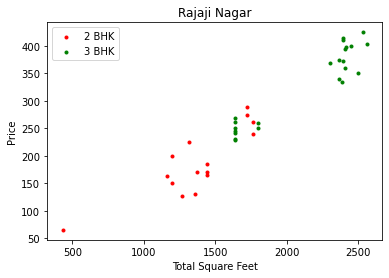

In [52]:
plot_scatter(final_removed_Outlier_df, 'Rajaji Nagar')

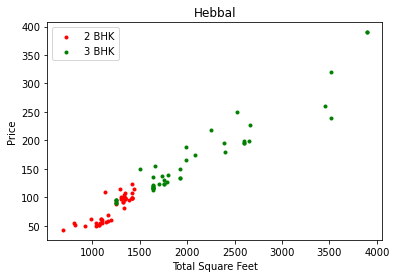

In [53]:
plot_scatter(final_removed_Outlier_df, 'Hebbal')

In [54]:
final_removed_Outlier_df = final_removed_Outlier_df[~(final_removed_Outlier_df.bath>final_removed_Outlier_df.BHK)]
final_removed_Outlier_df

,location,size,total_sqft,bath,price,BHK,price_per_sqft,price_per_sqft_minmax
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,8
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,7
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.0,6,10416.666667,6
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,7
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.0,7,9139.784946,5
...,...,...,...,...,...,...,...,...
10967,other,2 BHK,1200.0,2.0,70.0,2,5833.333333,3
10968,other,1 BHK,1800.0,1.0,200.0,1,11111.111111,6
10971,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333,6
10972,other,2 BHK,1353.0,2.0,110.0,2,8130.081301,4


In [55]:
dum = pd.get_dummies(final_removed_Outlier_df.location)
dum

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10967,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10968,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10972,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
final_df = pd.concat([final_removed_Outlier_df,dum], axis = "columns")
final_df

,location,size,total_sqft,bath,price,BHK,price_per_sqft,price_per_sqft_minmax,1st Block Jayanagar,1st Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860,8,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491,7,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,6 BHK,1200.0,6.0,125.0,6,10416.666667,6,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333,7,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,7 Bedroom,930.0,4.0,85.0,7,9139.784946,5,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10967,other,2 BHK,1200.0,2.0,70.0,2,5833.333333,3,0,0,...,0,0,0,0,0,0,0,0,0,1
10968,other,1 BHK,1800.0,1.0,200.0,1,11111.111111,6,0,0,...,0,0,0,0,0,0,0,0,0,1
10971,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333,6,0,0,...,0,0,0,0,0,0,0,0,0,1
10972,other,2 BHK,1353.0,2.0,110.0,2,8130.081301,4,0,0,...,0,0,0,0,0,0,0,0,0,1


In [57]:
final_df.drop(['location','other','size'], axis = 'columns', inplace = True)
final_df

,total_sqft,bath,price,BHK,price_per_sqft,price_per_sqft_minmax,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,15017.543860,8,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,11901.840491,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,125.0,6,10416.666667,6,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,235.0,3,12533.333333,7,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,85.0,7,9139.784946,5,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10967,1200.0,2.0,70.0,2,5833.333333,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10968,1800.0,1.0,200.0,1,11111.111111,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10971,1200.0,5.0,130.0,6,10833.333333,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10972,1353.0,2.0,110.0,2,8130.081301,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X = final_df.drop(['price','price_per_sqft_minmax','price_per_sqft'], axis = 'columns')
X

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,6.0,6,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,930.0,4.0,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10967,1200.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10968,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10971,1200.0,5.0,6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10972,1353.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y = final_df.price
y

0        428.0
1        194.0
2        125.0
3        235.0
4         85.0
         ...  
10967     70.0
10968    200.0
10971    130.0
10972    110.0
10973     26.0
Name: price, Length: 7294, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state = 10)

In [61]:
X_train.shape

(6564, 243)

In [62]:
X_test.shape

(730, 243)

In [63]:
from sklearn.linear_model import LinearRegression

mod = LinearRegression()

mod.fit(X_train,y_train)

LinearRegression()

In [64]:
accuracy = mod.score(X_test,y_test)
accuracy

0.8463746095733291

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
cross_val_score(LinearRegression(), X, y, cv = cv)


array([0.84431698, 0.75821321, 0.81983803, 0.84604464, 0.78102769])

In [66]:
from sklearn.model_selection import GridSearchCV

parameters = [{
    'fit_intercept':[True, False],
    'normalize':[True, False]    
}]

grid_search = GridSearchCV(estimator = mod,
                          param_grid = parameters, 
                          scoring = 'accuracy')

grid_search = grid_search.fit(X_train, y_train)
grid_search

C:\Users\bidve\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\bidve\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

C:\Users\bidve\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\bidve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 202, in accuracy_score
    y_type, y_true, 

GridSearchCV(estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False],
                          'normalize': [True, False]}],
             scoring='accuracy')

In [67]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    
    if(loc_index>=0):
        x[loc_index] = 1
        
    return mod.predict([x])[0]

In [68]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

83.96821345754772

In [71]:
import pickle

with open('Real_Estate_Price_Prediction_of_Bangalore.pkl', 'wb') as f:
    pickle.dump(mod,f)

In [72]:
# Columns information

import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))